In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# allows to import of modules
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
nb_dir
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from pathlib import Path
from torch.utils.data import DataLoader
import torch.nn as nn
import torch

In [5]:
# My modules

In [6]:
from dataset import OTU_2dDataSet
from train import Training
import metrics
import model
import train

## Setup data

In [7]:
DATA_DIR = Path("../../data/OTU_2d")

In [8]:
images_dir = DATA_DIR/'images'
labels_dir = DATA_DIR/'annotations'
train_csv = DATA_DIR/'train_cls.txt'

In [9]:
ds = OTU_2dDataSet(images_dir, labels_dir, train_csv)

In [10]:
len(ds)

1000

In [11]:
im, lbl, fname = ds[200];
im.shape

torch.Size([3, 256, 256])

In [12]:
lbl.max()

tensor(1.)

In [13]:
# import matplotlib.pyplot as plt
# plt.imshow(  (im*255).permute(1, 2, 0)  )

In [ ]:
dl = DataLoader(ds, batch_size=2, shuffle=True)

## Metrics

In [15]:
#  ! pip install tensorboard

In [16]:
#! pip install sklearn

In [17]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('../../data/runs/run-6/')

In [18]:
acc =  metrics.Accuracy()
miou = metrics.Miou()
manager = metrics.MetricManager([acc, miou], writer)


## Training

In [19]:
n_classes = 1
net = model.ResNetUNet(n_classes)
net.cuda()
1

1

In [20]:
criterion = nn.BCEWithLogitsLoss()
# criterion = nn.BCELoss()


# optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [21]:
trainer = train.Training(manager, criterion, optimizer, dl, 10, net, "../../data/runs/")

In [22]:
trainer.run()

Epoch 1/10


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 2/10


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 3/10


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 4/10


  0%|          | 0/500 [00:00<?, ?it/s]

## Inference

In [23]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

In [25]:
m = nn.Sigmoid().cuda()

In [26]:
pred = m(net((im[None]).cuda()))

In [27]:
pred[0].shape

torch.Size([1, 256, 256])

In [28]:
imnp = pred[0].detach().cpu().numpy()

In [29]:
np.unique((imnp > 0.8).astype(int))

array([0, 1])

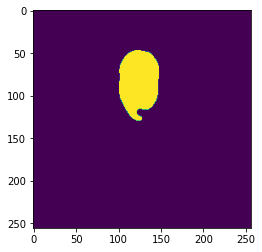

In [30]:
plt.imshow((imnp.reshape((256,256)) > 0.5).astype(int))

In [31]:
lbl.shape

torch.Size([1, 256, 256])

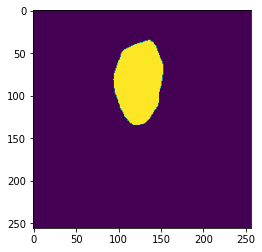

In [32]:
plt.imshow(lbl.numpy().reshape((256,256)))

In [33]:
val_csv = DATA_DIR/'val_cls.txt'
ds_val = OTU_2dDataSet(images_dir, labels_dir, val_csv)


In [34]:
im_v, lbl_v = ds_val[33]

ValueError: too many values to unpack (expected 2)

In [ ]:
m = nn.Sigmoid().cuda()
pred = m(net((im_v[None]).cuda()))

In [ ]:
imnp = pred[0].detach().cpu().numpy()
plt.imshow((imnp.reshape((256,256)) > 0.5).astype(int))

In [ ]:
plt.imshow(lbl_v.numpy().reshape((256,256)))